# Conversation Visibility Diagrams

One aspect of Mastodon and/or the Fediverse is federation. For my purposes here the big consequence is that each instance uses its own dataset to answer queries. This notebook studies how the answer to the list of replies can differ between instances. The goal being is to bring the answers of "How you think the Fediverse works" and "How the Fediverse works" closer together. It is not a statement about "How the Fediverse should work".

As I consider the diagrams generated by this notebook as pretty, you may also consider this as art.

In [1]:
%matplotlib inline
import hypernetx as hnx
import networkx as nx

from mastodon_recommender.reply_analyzer import ReplyAnalyzer

# This is the account name of the status we are looking the replies up for
account = "@rahmstorf@fediscience.org"

# This is the URL of the status, we are looking the replies up for on its origin server
status_url = "https://fediscience.org/@rahmstorf/109616283128454786"

instances = ["towns.gay", "mastodon.green", "mas.to", 'scicomm.xyz', "botsin.space", "hachyderm.io", "zirk.us", "wandering.shop", "freethought.online"]


ra = ReplyAnalyzer(account, status_url, instances)


### Fetching Data

The next cell fetches the data about one of my posts from various instances specified in the list instances. The code queries various mastodon instances without using any credentials.

In [2]:
edges = ra.create_reply_graph_edges()
reply_to_instances = ra.instance_letters_by_reply()

Fetched 0 replies from towns.gay in 4.9920899868011475 seconds
Fetched 40 replies from mastodon.green in 1.5116994380950928 seconds
Fetched 41 replies from mas.to in 1.6039512157440186 seconds
Fetched 34 replies from scicomm.xyz in 2.152822256088257 seconds
Fetched 7 replies from botsin.space in 3.2198498249053955 seconds
Fetched 34 replies from hachyderm.io in 1.5308725833892822 seconds
Fetched 35 replies from zirk.us in 1.6202590465545654 seconds
Fetched 34 replies from wandering.shop in 4.049075365066528 seconds
Fetched 0 replies from freethought.online in 1.7815933227539062 seconds
Fetched 53 replies from fediscience.org in 2.305267333984375 seconds


## Conversation Visibility Graph

The next diagram shows the conversation graph. Statues are represented by a dot. A directed edge is represent going from reply to the status that was replied to.

The big blue dot represents the original status. The various pastell colored nodes represent the replies. The letters represent an instance according to the list displayed. For example the BE means that the reply is visible on mas.to and hachyderm.io.

A: mastodon.green
B: mas.to
C: scicomm.xyz
D: botsin.space
E: hachyderm.io
F: zirk.us
G: wandering.shop
H: fediscience.org


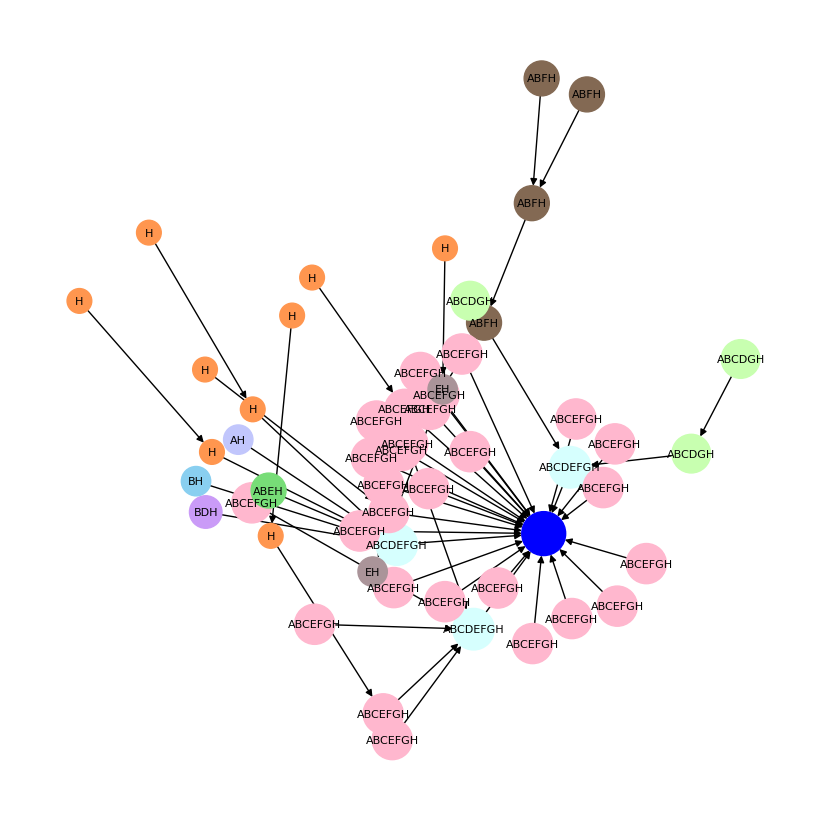

In [5]:
G, labels, node_sizes, node_colors = ra.build_conversation_visibility_graph()

for instance in ra.instances_with_replies():
    print(f"{ra.instance_to_letter(instance)}: {instance}")

node_sizes = [x ** 0.5 * 10 for x in node_sizes]

nx.draw(G, with_labels=True, labels=labels, node_size=node_sizes, node_color=node_colors, font_size=8)

## Visibility on Instance Diagram

The next graph illustrates the visibility depending on the instance. Black dots represent a reply. A black dot with a x2 represetns two replies.

This means that on mas.to all replies are visible.

This means that on botsin.space only one reply is visible.

This means that on wandering.shop 4 replies are visible, that are different from the one visible on botsin.space.

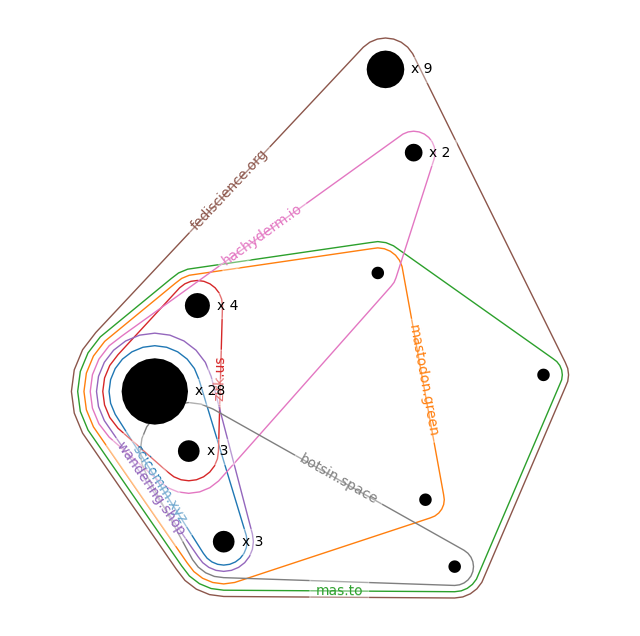

In [4]:
H = hnx.Hypergraph(ra.replies_by_instance())
hnx.drawing.draw(H.collapse_nodes(), with_node_counts=True)